In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import seaborn as sns

import sklearn as sk
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# load data

advertising = pd.read_csv('./data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()
advertising.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


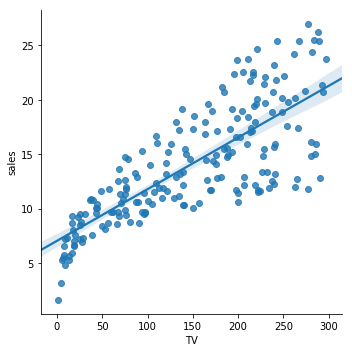

In [3]:
sns.lmplot('TV', 'sales', data = advertising)

In [4]:
tv = advertising.TV
sales = advertising.sales

beta1 = ((tv - tv.mean()) * (sales - sales.mean())).sum() / ((tv - tv.mean()) ** 2).sum()
beta0 = sales.mean() - beta1 * tv.mean()

rss = np.sum((beta0 + beta1 * tv - sales) ** 2) / 1000

print(f'beta1: {beta1}, beta0: {beta0}')
print(f'rss: {rss}')


beta1: 0.04753664043301969, beta0: 7.032593549127705
rss: 2.102530583131352


min rss: 2.102632807238421
min_beta0: 7.020202020202021, min_beta1: 0.04772727272727273


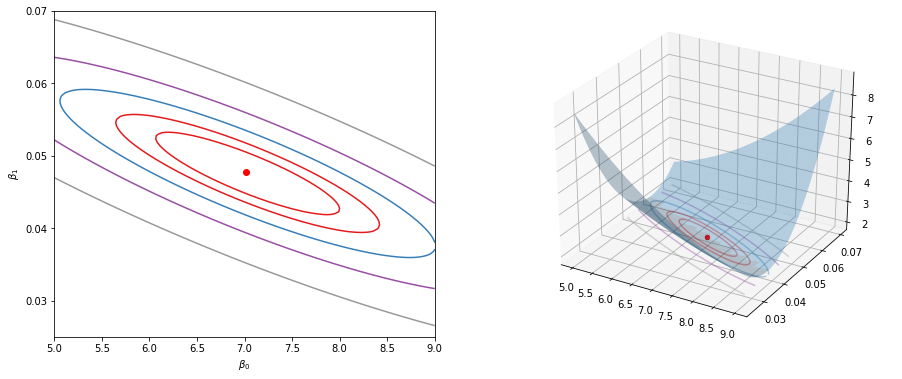

In [10]:
# plot contour and 3d plots of rss
    
beta0 = np.linspace(5, 9, 100)
beta1 = np.linspace(0.025, 0.07, 100)

beta0, beta1 = np.meshgrid(beta0, beta1, indexing='xy')

rss = np.zeros_like(beta0)
for i in range(tv.size):
    rss += (beta0 + beta1 * tv[i] - sales[i]) ** 2 / 1000
    
min_rss = rss.min()
min_arg = np.unravel_index(rss.argmin(), rss.shape)
min_beta0, min_beta1 = beta0[min_arg], beta1[min_arg]
print(f'min rss: {min_rss}')
print(f'min_beta0: {min_beta0}, min_beta1: {min_beta1}')
    
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

ax1.contour(beta0, beta1, rss, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(min_beta0, min_beta1, c='r')
ax1.set_xlabel(r'$\beta_{0}$')
ax1.set_ylabel(r'$\beta_{1}$')

ax2.plot_surface(beta0, beta1, rss, rstride=3, alpha=0.3)
ax2.contour(beta0, beta1, rss, zdir='z', offset=rss.min(), alpha=0.4,
            cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(min_beta0, min_beta1, min_rss, c='r')

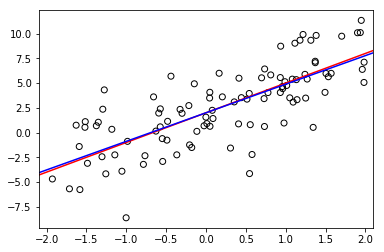

In [6]:
## Assessing the accuracy of the coefficient estimates
size = 100
X = np.random.uniform(-2, 2, (size, 1))
y_acc = 2 + 3 * X
y = y_acc + np.random.normal(0, 3, (size, 1))


regr = LinearRegression()
regr.fit(X, y)

plt.xlim(-2.1, 2.1)
plt.scatter(X, y, facecolors='none', edgecolor='black')

X = np.linspace(-2.1, 2.1, 100)
y_acc = 2 + 3 * X
y_pred = regr.predict(X[:, np.newaxis])
plt.plot(X, y_acc, c='r')
plt.plot(X, y_pred, c='b')


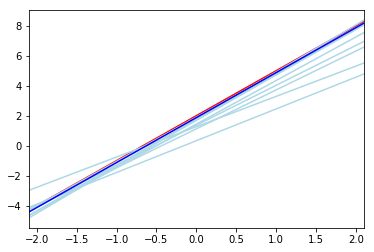

In [7]:
size = 100
X = np.linspace(-2.1, 2.1, 100)
y = 2 + 3 * X

plt.xlim(-2.1, 2.1)
plt.plot(X, y, c='r')

X = np.random.uniform(-2, 2, (size, 1))
y = 2 + 3 * X + np.random.normal(0, 3, (size, 1))

for size in np.arange(10, 101, 10):
    regr.fit(X[:size, :], y[:size])
    X_pred = np.linspace(-2.1, 2.1, 100)
    y_pred = regr.predict(X_pred[:, np.newaxis])
    plt.plot(X_pred, y_pred, c = 'b' if size == 100 else 'lightblue')
    

In [8]:
'''
Y = 2 + 3X + e
suppose that we are interested in knowing
the population mean μ of some random variable Y.

Unfortunately, μ is unknown, but we do have access
to n observations from Y , which we can
write as y1,...,yn, and which we can use to estimate μ.

A reasonable estimate is ˆμ = ¯y, where ¯y is the sample mean.
This estimate is unbiased.

That sample mean is not population mean, but in general
the sample mean can will provide a good esimate of
the population mean.

It is same to the unknown coefficients β0 and β1 in linear regression.
We seek to estimate these unknown coefficients using βˆ0 and βˆ1 given in (3.4).

Also the standard error of ˆμ can analogy to standard error βˆ0 and βˆ1.
'''

n = 100

X = np.random.uniform(-2, 2, (n, 1))
y_acc = 2 + 3 * X
y = y_acc + np.random.normal(0, 1, (n, 1))

regr.fit(X, y)

beta0 = regr.intercept_[0]
beta1 = regr.coef_[0][0]

rss = np.sum((beta0 + beta1 * X - y) ** 2)
rse = np.sqrt(rss / (n - 2))

seb0 = rse * np.sqrt(1 / n + X.mean() ** 2 /  np.sum((X - X.mean()) ** 2))
seb1 = rse / np.sqrt(np.sum((X - X.mean()) ** 2))

print(f'estimate beta0: {beta0}, estimate beta1: {beta1}')
print(f'estimate σ2: {rse}')
print(f'beta0 is 95% in {[beta0 - 2 * seb0, beta0 + 2 * seb0]}')
print(f'beta1 is 95% in {[beta1 - 2 * seb1, beta1 + 2 * seb1]}')

estimate beta0: 2.0382418160677376, estimate beta1: 2.9831934348494213
estimate σ2: 0.8662012483382867
beta0 is 95% in [1.8648955182734437, 2.2115881138620312]
beta1 is 95% in [2.8342745076162621, 3.1321123620825806]


In [36]:
X = tv
y = sales
n = y.size

regr.fit(X[:, np.newaxis], y)

beta0 = regr.intercept_
beta1 = regr.coef_[0]

rss = np.sum((beta0 + beta1 * X - y) ** 2)
rse = np.sqrt(rss / (n - 2))


seb0 = rse * np.sqrt(1 / n + X.mean() ** 2 /  np.sum((X - X.mean()) ** 2))
seb1 = rse / np.sqrt(np.sum((X - X.mean()) ** 2))

print(f'estimate beta0: {beta0}, estimate beta1: {beta1}')
print(f'estimate σ2: {rse}')
print(f'beta0 is 95% in {[beta0 - 1.96 * seb0, beta0 + 1.96 * seb0]}')
print(f'beta1 is 95% in {[beta1 - 1.96 * seb1, beta1 + 1.96 * seb1]}')

print(f't-statistic: {(beta0 - 0) / seb0}')
print(f't-statistic: {(beta1 - 0) / seb1}')

from scipy.stats import ttest_ind as ttest


estimate beta0: 7.032593549127693, estimate beta1: 0.047536640433019764
estimate σ2: 3.258656368650462
beta0 is 95% in [6.1352213861916756, 7.9299657120637104]
beta1 is 95% in [0.042263050344937901, 0.052810230521101627]
t-statistic: 15.36027517411755
t-statistic: 17.667625600875564
Ttest_indResult(statistic=nan, pvalue=nan)


C:\Users\dev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\dev\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dev\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\dev\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\dev\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [41]:
'''
# hypothesis tests
null hypothesis: H0: There is no relationship between X and Y (beta1 = 0)
alternative hypothesis: Ha: There is some relationship between X and Y (beta1 != 0) 

# t-statistic: t = (beta1 - 0) / seb1
'''

import statsmodels.api as sm
import statsmodels.formula.api as smf

est = smf.ols('sales ~ TV', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           1.47e-42
Time:                        11:03:57   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
est = smf.ols('sales ~ newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sun, 11 Feb 2018   Prob (F-statistic):            0.00115
Time:                        11:03:57   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
est = smf.ols('sales ~ radio', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           4.35e-19
Time:                        11:03:57   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           1.58e-96
Time:                        11:03:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [47]:
'''
# Assessing the accuracy of the model

The quality of a linear regression fit is
assessed using two related quantities: the residual standard error (rse)
and the R^2 statistic.
'''


'\n# Assessing the accuracy of the model\n\nThe quality of a linear regression fit is\nassessed using two related quantities: the residual standard error (rse)\nand the R^2 statistic.\n'

In [61]:
## Qualittive regression

credit = pd.read_csv('./data/Credit.csv').drop(['Unnamed: 0'], axis=1)
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


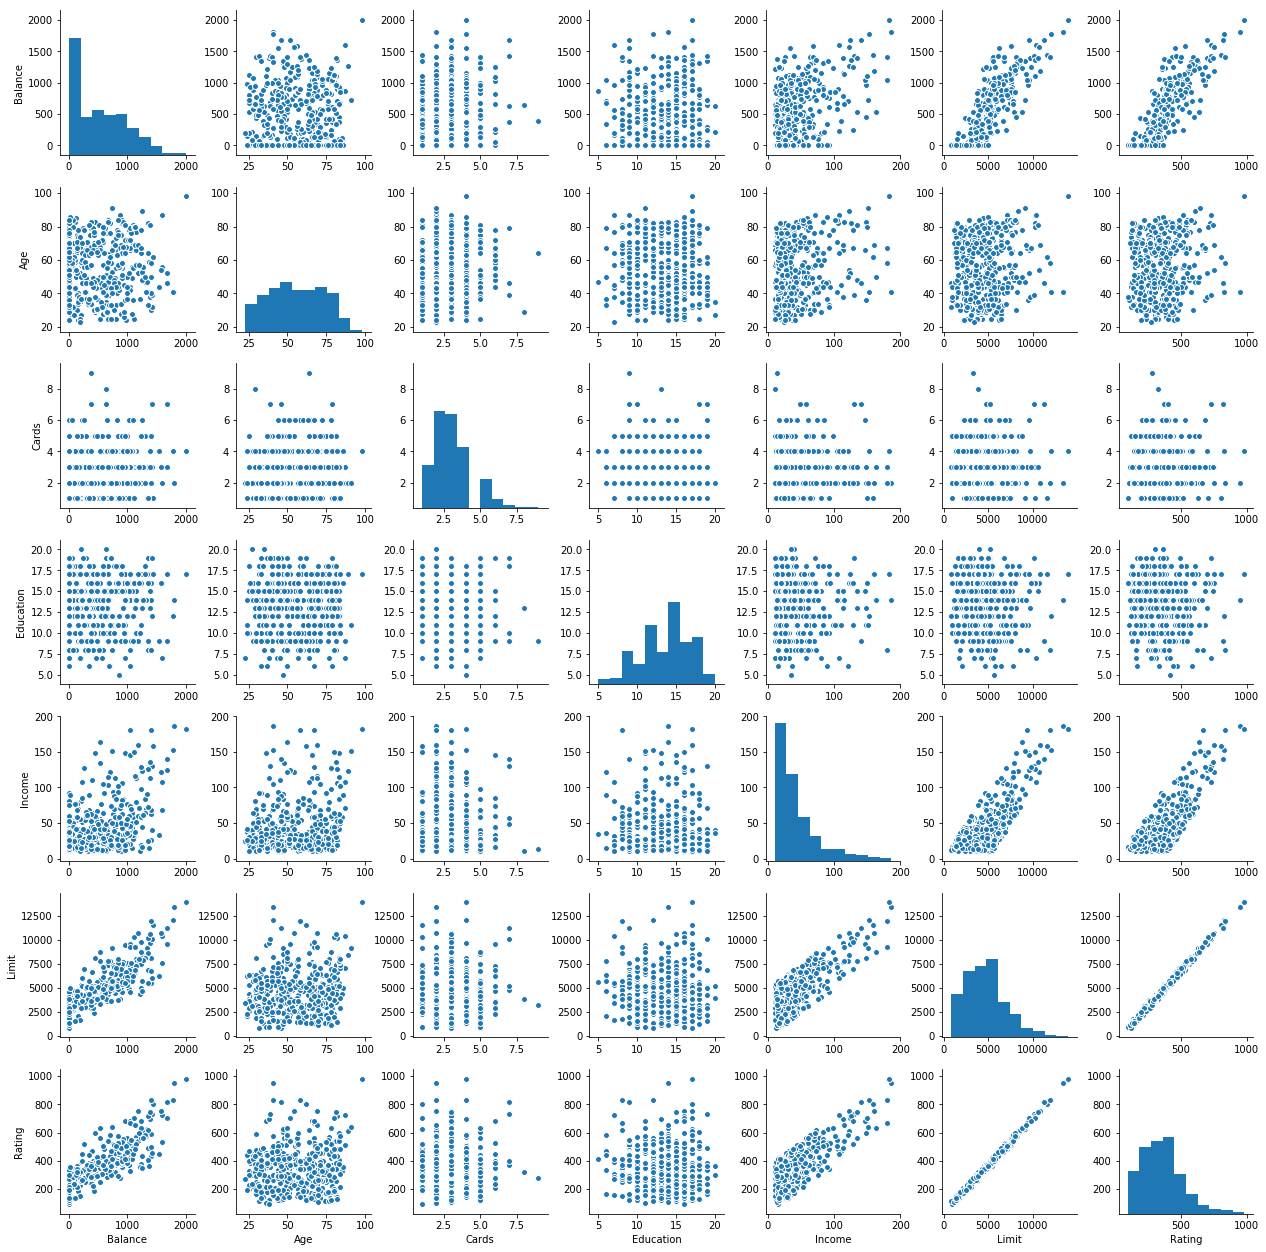

In [51]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])

In [52]:
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


In [57]:
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


In [58]:
est = smf.ols('Balance ~ Income + Student', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,211.1430,32.457,6.505,0.000,147.333,274.952
Student[T.Yes],382.6705,65.311,5.859,0.000,254.272,511.069
Income,5.9843,0.557,10.751,0.000,4.890,7.079


In [59]:
# remove the additive assumption

est = smf.ols('sales ~ TV + radio + TV*radio ', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 11 Feb 2018   Prob (F-statistic):          6.68e-146
Time:                        15:16:37   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


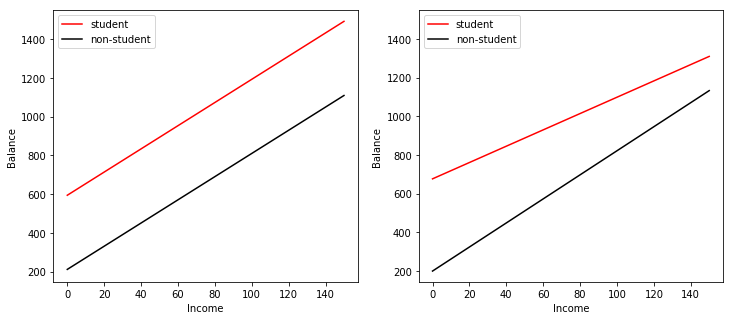

In [63]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                       regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                       regr2['Intercept']+regr2['Student2']+
                       150*(regr2['Income']+regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)